# Final Project

**Breast Cancer Prediction Dataset Analysis**

**Julianne Hoeflich, Hannah Padgette, and Haley Teil**

**STAT 5000 - Spring 2024**

**Dr. Matt Reichenbach**

**University of Colorado Boulder**

Insert some sort of description of the dataset, motivation, etc. in this cell

In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import copy
import random

In [2]:
data = pd.read_csv('data.csv')
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


starting to look through the breast cancer dataset for the final project. I’m just starting with some exploratory analysis and noticed differences in the mean radius and area between malignant and benign samples. I’m thinking that some hypothesis testing for this could be relevant. And maybe some confidence intervals on the radius + mean between benign and malignant samples as well. I think I’m going to start off with my analysis there

In [3]:
data_malignant = data[data['diagnosis']=='M']
data_benign = data[data['diagnosis']=='B']

In [4]:
print('Mean of the radius mean, whole dataset: {:.3f}'.format(np.mean(data['radius_mean'])))
print('Mean of the radius mean, malignant samples: {:.3f}'.format(np.mean(data_malignant['radius_mean'])))
print('Mean of the radius mean, benign samples: {:.3f}\n'.format(np.mean(data_benign['radius_mean'])))

print('Standard deviation of the radius mean, whole dataset: {:.3f}'.format(np.std(data['radius_mean'])))
print('Standard deviation of the radius mean, malignant samples: {:.3f}'.format(np.std(data_malignant['radius_mean'])))
print('Standard deviation of the radius mean, benign samples: {:.3f}'.format(np.std(data_benign['radius_mean'])))

Mean of the radius mean, whole dataset: 14.127
Mean of the radius mean, malignant samples: 17.463
Mean of the radius mean, benign samples: 12.147

Standard deviation of the radius mean, whole dataset: 3.521
Standard deviation of the radius mean, malignant samples: 3.196
Standard deviation of the radius mean, benign samples: 1.778


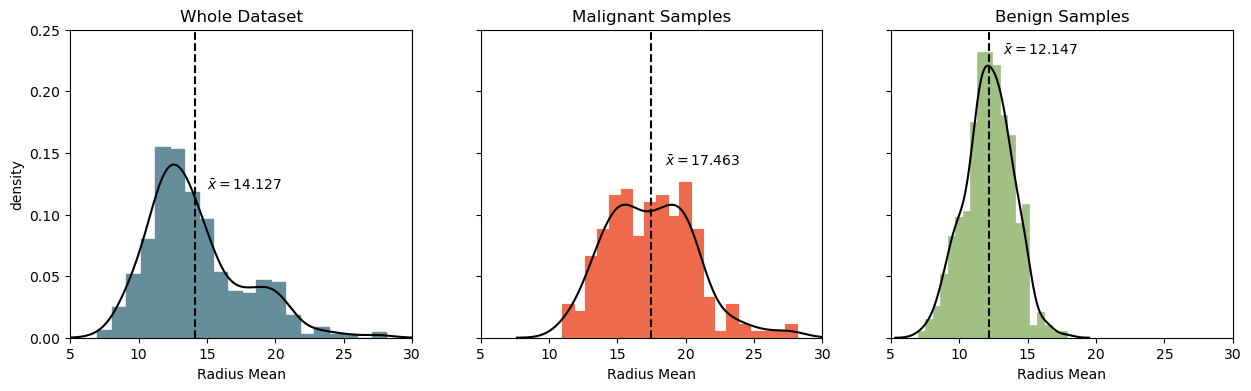

In [5]:
fig, ax = plt.subplots(1,3, sharex=True, sharey=True, figsize=(15,4))
plt.ylim(0,0.25)
plt.xlim(5,30)

sns.histplot(ax=ax[0], data=data, x='radius_mean', stat='density', bins=20, color='#658e9c', edgecolor='#658e9c', alpha=1)
sns.kdeplot(ax=ax[0], data=data, x='radius_mean', color='k')
ax[0].axvline(x=np.mean(data['radius_mean']), color='k', linestyle='--')
ax[0].set_xlabel('Radius Mean')
ax[0].set_ylabel('density')
ax[0].set_title('Whole Dataset')
ax[0].text(15,0.12,r'$\bar{x}=14.127$')

sns.histplot(ax=ax[1], data=data_malignant, x='radius_mean', stat='density', bins=20, color='#ee6c4d', edgecolor='#ee6c4d', alpha=1)
sns.kdeplot(ax=ax[1], data=data_malignant, x='radius_mean', color='k')
ax[1].axvline(x=np.mean(data_malignant['radius_mean']), color='k', linestyle='--')
ax[1].set_xlabel('Radius Mean')
ax[1].set_ylabel('density')
ax[1].set_title('Malignant Samples')
ax[1].text(18.5,0.14,r'$\bar{x}=17.463$')

sns.histplot(ax=ax[2], data=data_benign, x='radius_mean', stat='density', bins=20, color='#a1c084', edgecolor='#a1c084', alpha=1)
sns.kdeplot(ax=ax[2], data=data_benign, x='radius_mean', color='k')
ax[2].axvline(x=np.mean(data_benign['radius_mean']), color='k', linestyle='--')
ax[2].set_xlabel('Radius Mean')
ax[2].set_ylabel('density')
ax[2].set_title('Benign Samples')
ax[2].text(13.2,0.23,r'$\bar{x}=12.147$')

plt.savefig("hannah-1.png", bbox_inches="tight", dpi=300)

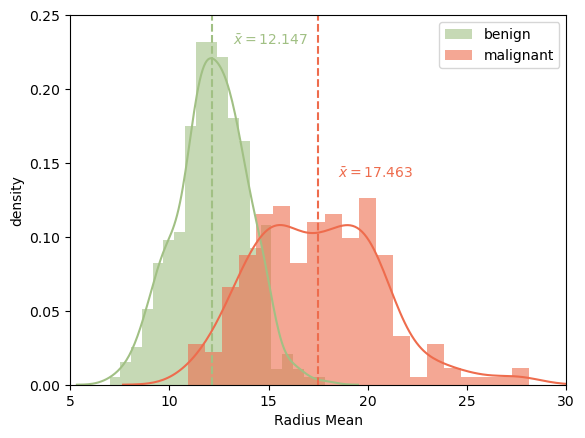

In [6]:
fig, ax = plt.subplots()

sns.histplot(data=data_benign, x='radius_mean', stat='density', bins=20, color='#a1c084', edgecolor=None, alpha=0.6, label='benign')
sns.kdeplot(data=data_benign, x='radius_mean', color='#a1c084')
ax.axvline(x=np.mean(data_benign['radius_mean']), color='#a1c084', linestyle='--')

sns.histplot(data=data_malignant, x='radius_mean', stat='density', bins=20, color='#ee6c4d', edgecolor=None, alpha=0.6, label='malignant')
sns.kdeplot(data=data_malignant, x='radius_mean', color='#ee6c4d')
ax.axvline(x=np.mean(data_malignant['radius_mean']), color='#ee6c4d', linestyle='--')

ax.text(18.5,0.14,r'$\bar{x}=17.463$', color='#ee6c4d')
ax.text(13.2,0.23,r'$\bar{x}=12.147$', color='#a1c084')

plt.legend(loc='upper right', fontsize=10)
ax.set_xlabel('Radius Mean')
ax.set_ylabel('density')
ax.set_ylim(0,0.25)
ax.set_xlim(5,30)

plt.savefig("hannah-2.png", bbox_inches="tight", dpi=300)

want to do a test to see if the means are different

First, need to know if we can assume that the distributions can be approximated as normal. To do this, we can perform a Shapiro-Wilk test. A Shapiro-Wilk test is a test of normality which "determines whether the given samples comes from a normal distribution or not" ([source](https://www.geeksforgeeks.org/how-to-perform-a-shapiro-wilk-test-in-python/)). For a Shapiro test, the null hypothesis is that the population is distributed normally. 

cell subgroups - normal + cancerous cells both present in the sample is causing the distribution to be bimodal? principal component analysis?

In [7]:
print(stats.shapiro(data_benign['radius_mean'])) # stat,pval = ...
print(stats.shapiro(data_malignant['radius_mean']))

ShapiroResult(statistic=0.9966524839401245, pvalue=0.6678164005279541)
ShapiroResult(statistic=0.9776594042778015, pvalue=0.0018943677423521876)


In [8]:
# can do an f-test to determine if variances are equal
# https://www.itl.nist.gov/div898/handbook/eda/section3/eda359.htm#:~:text=An%20F%2Dtest%20(Snedecor%20and,the%20variances%20are%20not%20equal.
# https://www.geeksforgeeks.org/how-to-perform-an-f-test-in-python/
 
df1 = len(data_benign['radius_mean']) - 1
df2 = len(data_malignant['radius_mean']) - 1

var1 = np.var(data_benign['radius_mean'], ddof=1)
var2 = np.var(data_malignant['radius_mean'], ddof=1)

f = var1 / var2
p_value = 2*(1-stats.f.cdf(f,df1,df2))
p_value

2.0

In [9]:
# default is a two-sided test, don't need to specity alternative='two-sided'
# not going to assume that the variances are equal --> equal_var=False --> Welch's t-test for unequal variances
t_statistic, p_value = stats.ttest_ind(data_malignant['radius_mean'], data_benign['radius_mean'], equal_var=False)

# Print the results
print("T-statistic:", t_statistic)
print("P-value:", p_value)

# Interpret the results
alpha = 0.05  # Significance level
if p_value < alpha:
    print("Reject the null hypothesis. Means are significantly different.")
else:
    print("Fail to reject the null hypothesis. Means are not significantly different.")

T-statistic: 22.208797758464527
P-value: 1.6844591259582747e-64
Reject the null hypothesis. Means are significantly different.


**bootstrapping for CIs on the means (?) + z-score confidence intervals**

For a z-score confidence interval on the population mean, using the pivotal quantity - see page 25 in the unit 5 lectures notes -- becuase I have a large sample size and the Central Limit Theorem applies

In [10]:
alpha = 0.01
zscore = stats.norm.ppf(1-alpha/2)

xbar_malignant = np.mean(data_malignant['radius_mean'])
xbar_benign = np.mean(data_benign['radius_mean'])

sigma_malignant = np.std(data_malignant['radius_mean'])
sigma_benign = np.std(data_benign['radius_mean'])

n_malignant = len(data_malignant['radius_mean'])
n_benign = len(data_benign['radius_mean'])

LX_malignant_zscore = xbar_malignant - zscore * sigma_malignant / np.sqrt(n_malignant)
UX_malignant_zscore = xbar_malignant + zscore * sigma_malignant / np.sqrt(n_malignant)

LX_benign_zscore = xbar_benign - zscore * sigma_benign / np.sqrt(n_benign)
UX_benign_zscore = xbar_benign + zscore * sigma_benign / np.sqrt(n_benign)

print(f'The mean of the radius mean distribution for the malignant samples is: {xbar_malignant:.3f}.')
print(f'The {(1-alpha)*100}% confidence interval on the mean of the radius mean distribution for the malignant samples is: ({LX_malignant_zscore:.3f},{UX_malignant_zscore:.3f}).\n')

print(f'The mean of the radius mean distribution for the benign samples is: {xbar_benign:.3f}.')
print(f'The {(1-alpha)*100}% confidence interval on the mean of the radius mean distribution for the benign samples is: ({LX_benign_zscore:.3f},{UX_benign_zscore:.3f}).\n')

The mean of the radius mean distribution for the malignant samples is: 17.463.
The 99.0% confidence interval on the mean of the radius mean distribution for the malignant samples is: (16.897,18.028).

The mean of the radius mean distribution for the benign samples is: 12.147.
The 99.0% confidence interval on the mean of the radius mean distribution for the benign samples is: (11.904,12.389).



In [11]:
# bootstrapping - malignant samples
n = len(data_malignant['radius_mean'])
x = data_malignant['radius_mean']
xbar = np.mean(data_malignant['radius_mean'])
print(f'The mean of the radius mean distribution for the malignant samples is: {xbar_malignant:.3f}.')

B = 5000 # number of bootstrap samples
bootstrap = np.zeros((B,n))

np.random.seed(10)

for i in range(B):
    bootstrap[i,:] = np.random.choice(x, size=n, replace=True)

muStar = np.mean(bootstrap, axis=1)

percentiles = np.percentile(muStar, [(alpha/2)*100,(1-alpha/2)*100])

LX_malignant_BS_percentile = percentiles[0]
UX_malignant_BS_percentile = percentiles[1]

# percentile CI
print(f'Using bootstrapping, the {(1-alpha)*100}% percentile confidence interval on the mean of the radius mean distribution for the malignant samples is: ({LX_malignant_BS_percentile:.3f},{UX_malignant_BS_percentile:.3f})')

# pivot CI 
UX_malignant_BS_pivot = 2*xbar-percentiles[0]
LX_malignant_BS_pivot = 2*xbar-percentiles[1]
print(f'Using bootstrapping, the {(1-alpha)*100}% pivot confidence interval on the mean of the radius mean distribution for the malignant samples is: ({LX_malignant_BS_pivot:.3f},{UX_malignant_BS_pivot:.3f})')

The mean of the radius mean distribution for the malignant samples is: 17.463.
Using bootstrapping, the 99.0% percentile confidence interval on the mean of the radius mean distribution for the malignant samples is: (16.915,18.016)
Using bootstrapping, the 99.0% pivot confidence interval on the mean of the radius mean distribution for the malignant samples is: (16.910,18.011)


In [12]:
# bootstrapping - malignant samples
n = len(data_benign['radius_mean'])
x = data_benign['radius_mean']
xbar = np.mean(data_benign['radius_mean'])
print(f'The mean of the radius mean distribution for the benign samples is: {xbar_benign:.3f}.')

B = 5000 # number of bootstrap samples
bootstrap = np.zeros((B,n))

np.random.seed(10)

for i in range(B):
    bootstrap[i,:] = np.random.choice(x, size=n, replace=True)

muStar = np.mean(bootstrap, axis=1)

percentiles = np.percentile(muStar, [(alpha/2)*100,(1-alpha/2)*100])

LX_benign_BS_percentile = percentiles[0]
UX_benign_BS_percentile = percentiles[1]

# percentile CI
print(f'Using bootstrapping, the {(1-alpha)*100}% percentile confidence interval on the mean of the radius mean distribution for the benign samples is: ({LX_benign_BS_percentile:.3f},{UX_benign_BS_percentile:.3f})')

# pivot CI 
UX_benign_BS_pivot = 2*xbar-percentiles[0]
LX_benign_BS_pivot = 2*xbar-percentiles[1]
print(f'Using bootstrapping, the {(1-alpha)*100}% pivot confidence interval on the mean of the radius mean distribution for the benign samples is: ({LX_benign_BS_pivot:.3f},{UX_benign_BS_pivot:.3f})')

The mean of the radius mean distribution for the benign samples is: 12.147.
Using bootstrapping, the 99.0% percentile confidence interval on the mean of the radius mean distribution for the benign samples is: (11.900,12.382)
Using bootstrapping, the 99.0% pivot confidence interval on the mean of the radius mean distribution for the benign samples is: (11.911,12.393)


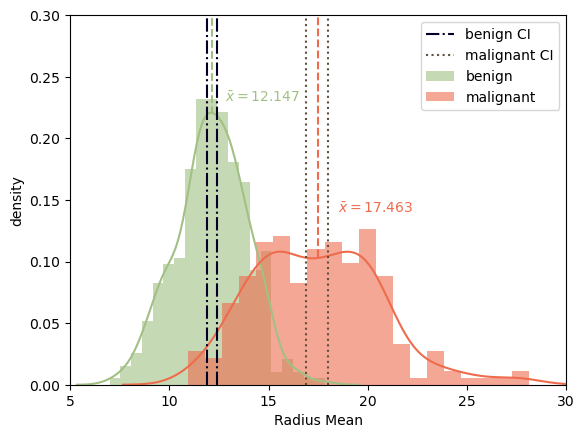

In [13]:
fig, ax = plt.subplots()

### PLOTTING BOTH 
sns.histplot(data=data_benign, x='radius_mean', stat='density', bins=20, color='#a1c084', edgecolor=None, alpha=0.6, label='benign')
sns.kdeplot( data=data_benign, x='radius_mean', color='#a1c084')
ax.axvline(x=np.mean(data_benign['radius_mean']), color='#a1c084', linestyle='--', ymin=0.22/0.30, ymax=1)
ax.text(12.8,0.23,r'$\bar{x}=12.147$', color='#a1c084')

sns.histplot(data=data_malignant, x='radius_mean', stat='density', bins=20, color='#ee6c4d', edgecolor=None, alpha=0.6, label='malignant')
sns.kdeplot(data=data_malignant, x='radius_mean', color='#ee6c4d')
ax.axvline(x=np.mean(data_malignant['radius_mean']), color='#ee6c4d', linestyle='--', ymin=0.104/0.30, ymax=1)
ax.text(18.5,0.14,r'$\bar{x}=17.463$', color='#ee6c4d')

ax.axvline(x=11.9, color='#030027', linestyle='-.', label='benign CI')
ax.axvline(x=12.4, color='#030027', linestyle='-.')

ax.axvline(x=16.9, color='#5E503F', linestyle=':', label='malignant CI')
ax.axvline(x=18.0, color='#5E503F', linestyle=':')

ax.legend(loc='upper right', fontsize=10)
ax.set_xlabel('Radius Mean')
ax.set_ylabel('density')
ax.set_ylim(0,0.3)
ax.set_xlim(5,30)

plt.savefig("hannah-3.png", bbox_inches="tight", dpi=300)